In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('Life Expectancy Data.csv')

In [2]:
# 1. Strip leading/trailing spaces from column names (e.g., ' Life expectancy ' -> 'Life expectancy')
df.columns = df.columns.str.strip()

# 2. Drop rows where the target (Life expectancy) is missing
df = df.dropna(subset=['Life expectancy'])

# 3. Fill missing values in features with the median
# We use median because it is less sensitive to outliers than the mean
df = df.fillna(df.median(numeric_only=True))

In [3]:
# Convert 'Status' (Developed/Developing) into 0s and 1s
df = pd.get_dummies(df, columns=['Status'], drop_first=True)

# Define X (Features) and y (Target)
# We drop 'Country' because it's a unique label, not a numerical predictor
X = df.drop(['Life expectancy', 'Country'], axis=1)
y = df['Life expectancy']

In [4]:
# Split into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions using the test set
y_pred = model.predict(X_test_scaled)

R-squared Score: 0.8195
Root Mean Squared Error: 3.95 years


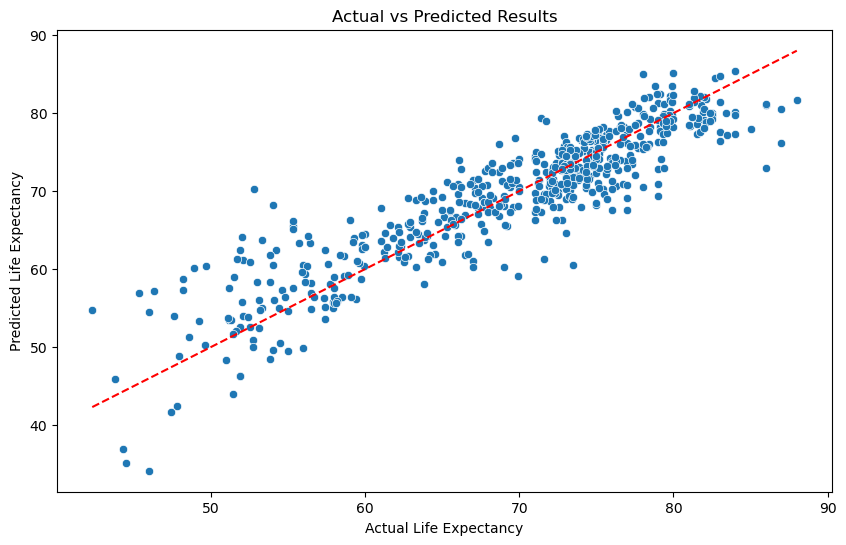

In [6]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"R-squared Score: {r2:.4f}")
print(f"Root Mean Squared Error: {rmse:.2f} years")

# Visualize Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Results')
plt.show()